In [1]:
## Global Power Plant Database of different country are given. 
## There are two target variable. First I will go with Primary Fuel then I will take capacity_mw as target variable.
## Varius attributes are given which are going to help our machine in predicting result.
## The data given is for different countries. I am applying concat to merge all data of different countries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
## Lets check the skewness of data.
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv("database_ARG.csv")

In [4]:
df2=pd.read_csv("database_AUS.csv")
df3=pd.read_csv("database_BRA.csv")


In [5]:
df4=pd.read_csv("database_CAN.csv")

In [6]:
df5=pd.read_csv("database_CDMDB.csv")

In [7]:
df6=pd.read_csv("database_CHL.csv")

In [8]:
df7=pd.read_csv("database_EPRTR.csv")

In [9]:
df8=pd.read_csv("database_GEODB.csv")

In [10]:
df9=pd.read_csv("database_IND.csv")

In [11]:
df10=pd.read_csv("database_MEX.csv")

In [12]:
df11=pd.read_csv("database_URY.csv")

In [13]:
df12=pd.read_csv("database_USA.csv")

In [14]:
df13=pd.read_csv("database_WRI.csv")

In [15]:
df14=pd.read_csv("finland_database.csv")

In [16]:
df15=pd.read_csv("yemen_database.csv")

In [17]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],axis=0)

In [18]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,generation_gwh_2018,generation_gwh_2019,generation_data_source,fuel1,fuel2,fuel3,fuel4
0,ARG,Argentina,AGUA DEL CAJON (AUTOGENERADOR DEL MEM),ARG0000231,479.20,-38.9368,-68.3556,Other,Gas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,Argentina,AGUA DEL CAJON (GENERADOR DEL MEM),ARG0000232,192.00,-38.9368,-68.3556,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARG,Argentina,AGUA DEL TORO,ARG0000210,130.00,-34.5792,-68.9892,Hydro,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,AGUA ESCONDIDA,ARG0000204,0.00,-36.1550,-68.3019,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,Argentina,ALGARROBO DEL AGUILA,ARG0000171,0.14,-36.3992,-67.1461,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,YEM,Yemen,Sana'a,YEM0000017,11.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN
8,YEM,Yemen,Shehr,YEM0000033,5.20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN
9,YEM,Yemen,Syaon1,YEM0000036,13.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN
10,YEM,Yemen,Syaon2,YEM0000039,12.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN


In [19]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source', 'fuel1', 'fuel2',
       'fuel3', 'fuel4'],
      dtype='object')

In [20]:
df.shape

(61493, 31)

In [21]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,generation_gwh_2018,generation_gwh_2019
count,58477.000000,53271.000000,5.327100e+04,21855.000000,0.0,30186.000000,6789.000000,7536.000000,8284.000000,8996.000000,9327.000000,0.0,9826.000000,9776.000000
mean,171.047393,51.254132,4.591112e+01,1997.235606,NaN,2017.732889,586.781088,649.562131,646.256702,580.307992,529.731920,NaN,516.048275,421.646856
std,502.992625,2648.581500,8.016580e+03,23.705420,NaN,1.334613,2150.531745,2213.285374,2255.501907,2092.154995,1995.589808,NaN,1972.534384,1692.693102
min,0.000000,-77.847000,-1.799777e+02,1896.000000,NaN,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,NaN,-982.622000,-780.339000
25%,3.600000,27.029700,-8.164970e+01,1989.000000,NaN,2017.000000,1.744000,2.021000,2.291000,2.268000,2.085000,NaN,2.125750,2.659000
50%,18.000000,39.255900,-7.794500e+00,2007.000000,NaN,2017.000000,22.623000,22.333500,22.330000,17.278000,13.687000,NaN,12.166000,11.276565
75%,80.600000,45.575850,3.443055e+01,2013.000000,NaN,2019.000000,197.057004,221.990250,237.438750,182.413194,160.051498,NaN,148.627750,120.794500
max,22500.000000,415750.000000,1.075853e+06,2020.000000,NaN,2019.000000,50834.000000,32320.917000,59546.865000,32377.477000,35116.000000,NaN,35136.000000,31920.368000


In [22]:
## We can see null value in many columns. Lets check it with different columns.
df.isnull().sum()

country                         0
country_long                    0
name                          116
gppd_idnr                       0
capacity_mw                  3016
latitude                     8222
longitude                    8222
primary_fuel                10498
other_fuel1                 59451
other_fuel2                 61217
other_fuel3                 61401
commissioning_year          39638
owner                       32280
source                        151
url                           168
geolocation_source           9878
wepp_id                     61493
year_of_capacity_data       31307
generation_gwh_2013         54704
generation_gwh_2014         53957
generation_gwh_2015         53209
generation_gwh_2016         52497
generation_gwh_2017         52166
estimated_generation_gwh    61493
generation_gwh_2018         51667
generation_gwh_2019         51717
generation_data_source      49868
fuel1                       55724
fuel2                       61326
fuel3         

In [23]:
## Here I am removing colum with more than 50% of null values as it is going to impact our model prediction.
df.drop('other_fuel1',
             axis = 1,
             inplace = True)
df.drop('other_fuel2',
             axis = 1,
             inplace = True)

df.drop('country_long',
             axis = 1,
             inplace = True)
df.drop('other_fuel3',
             axis = 1,
             inplace = True)
df.drop('wepp_id',
             axis = 1,
             inplace = True)
df.drop('generation_gwh_2013',
             axis = 1, 
             inplace = True)
df.drop('generation_gwh_2019', 
             axis = 1,
             inplace = True)
df.drop('generation_gwh_2014', 
             axis = 1,
             inplace = True)
df.drop('generation_gwh_2015', 
             axis = 1,
             inplace = True)
df.drop('generation_gwh_2016', 
             axis = 1,
             inplace = True)
df.drop('generation_gwh_2017', 
             axis = 1,
             inplace = True)
df.drop('generation_gwh_2018', 
             axis = 1,
             inplace = True)

df.drop('estimated_generation_gwh', 
             axis = 1,
             inplace = True)

df.drop('generation_data_source', 
             axis = 1,
             inplace = True)
df.drop('year_of_capacity_data', 
             axis = 1,
             inplace = True)
df.drop('name', 
             axis = 1,
             inplace = True)


df.drop('fuel1', 
             axis = 1,
             inplace = True)

df.drop('fuel2', 
             axis = 1,
             inplace = True)

df.drop('fuel3', 
             axis = 1,
             inplace = True)

df.drop('fuel4', 
             axis = 1,
             inplace = True)
df.shape

(61493, 11)

In [24]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['capacity_mw'].fillna(int(df['capacity_mw'].mean()), inplace=True)
df['commissioning_year'].fillna(method='ffill', inplace=True)
df['owner'].fillna(method='ffill', inplace=True)
df['url'] = df['url'].fillna(df['url'].mode()[0])
df['source'] = df['source'].fillna(df['source'].mode()[0])
df['primary_fuel'] = df['primary_fuel'].fillna(df['primary_fuel'].mode()[0])
df['latitude'].fillna(method='ffill', inplace=True)
df['longitude'].fillna(method='ffill', inplace=True)

In [25]:
df.isnull().sum()

country               0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
owner                 0
source                0
url                   0
geolocation_source    0
dtype: int64

In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head()

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source
0,4.0,224.0,479.20,-38.9368,-68.3556,8.0,1997.4,1472.0,485.0,182.0,17.0
1,4.0,225.0,192.00,-38.9368,-68.3556,3.0,1993.5,1472.0,485.0,182.0,17.0
2,4.0,203.0,130.00,-34.5792,-68.9892,5.0,1982.0,5249.0,485.0,182.0,17.0
3,4.0,197.0,0.00,-36.1550,-68.3019,7.0,1982.0,3306.0,485.0,182.0,17.0
4,4.0,169.0,0.14,-36.3992,-67.1461,7.0,1982.0,266.0,485.0,182.0,17.0


In [27]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("primary_fuel", axis=1)
y=df['primary_fuel']

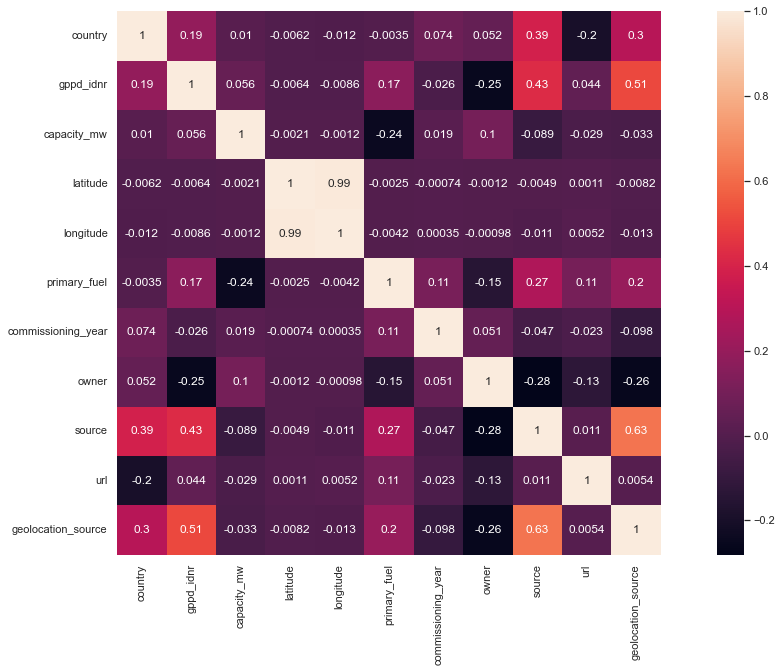

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

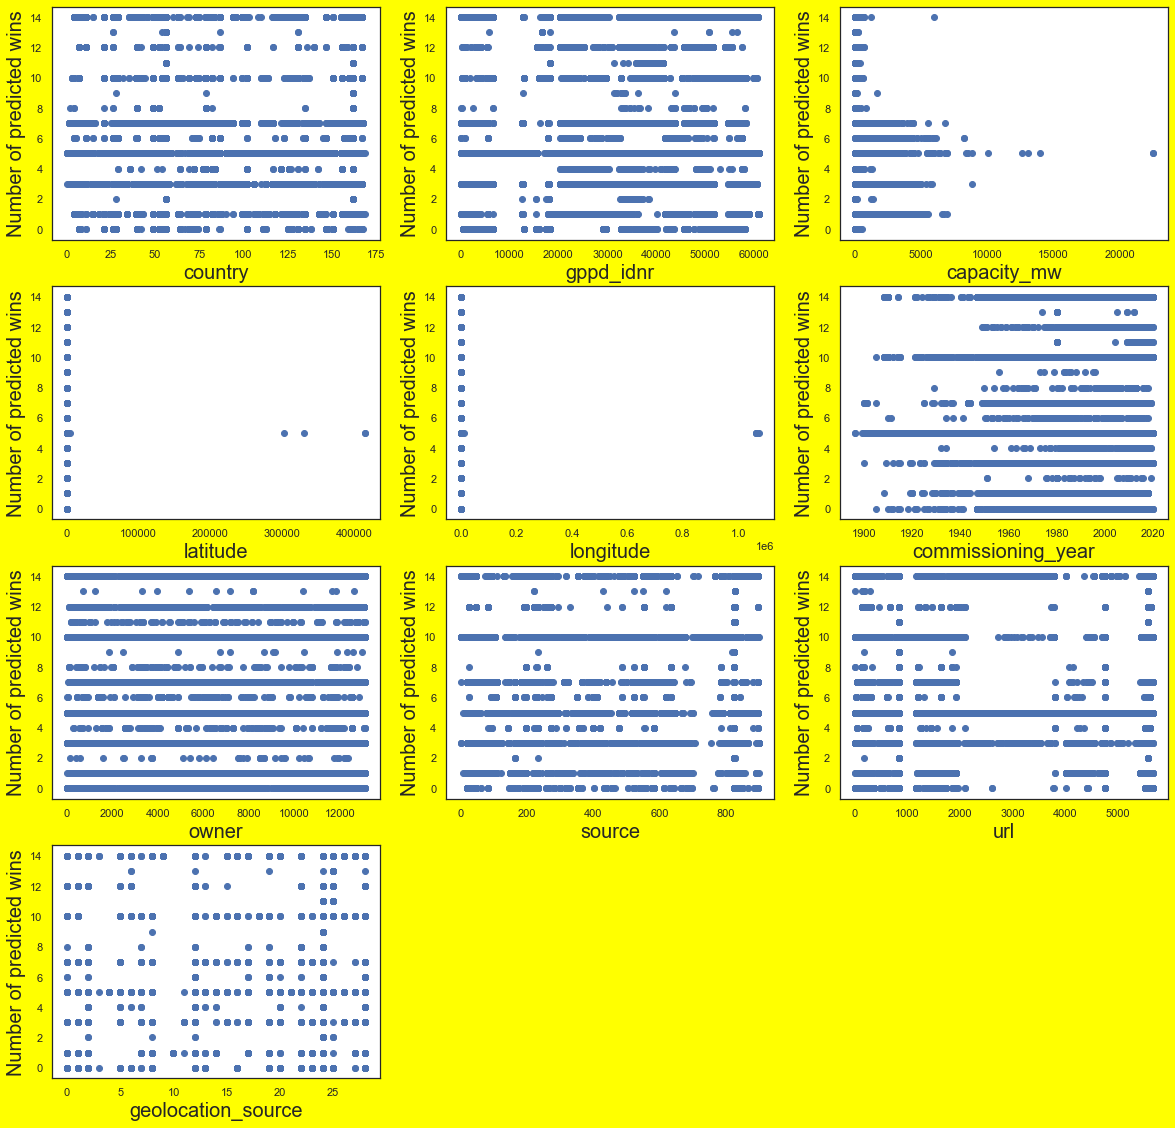

In [29]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Number of predicted wins',fontsize=20)
        
        plotnumber+=1
        
plt.show()

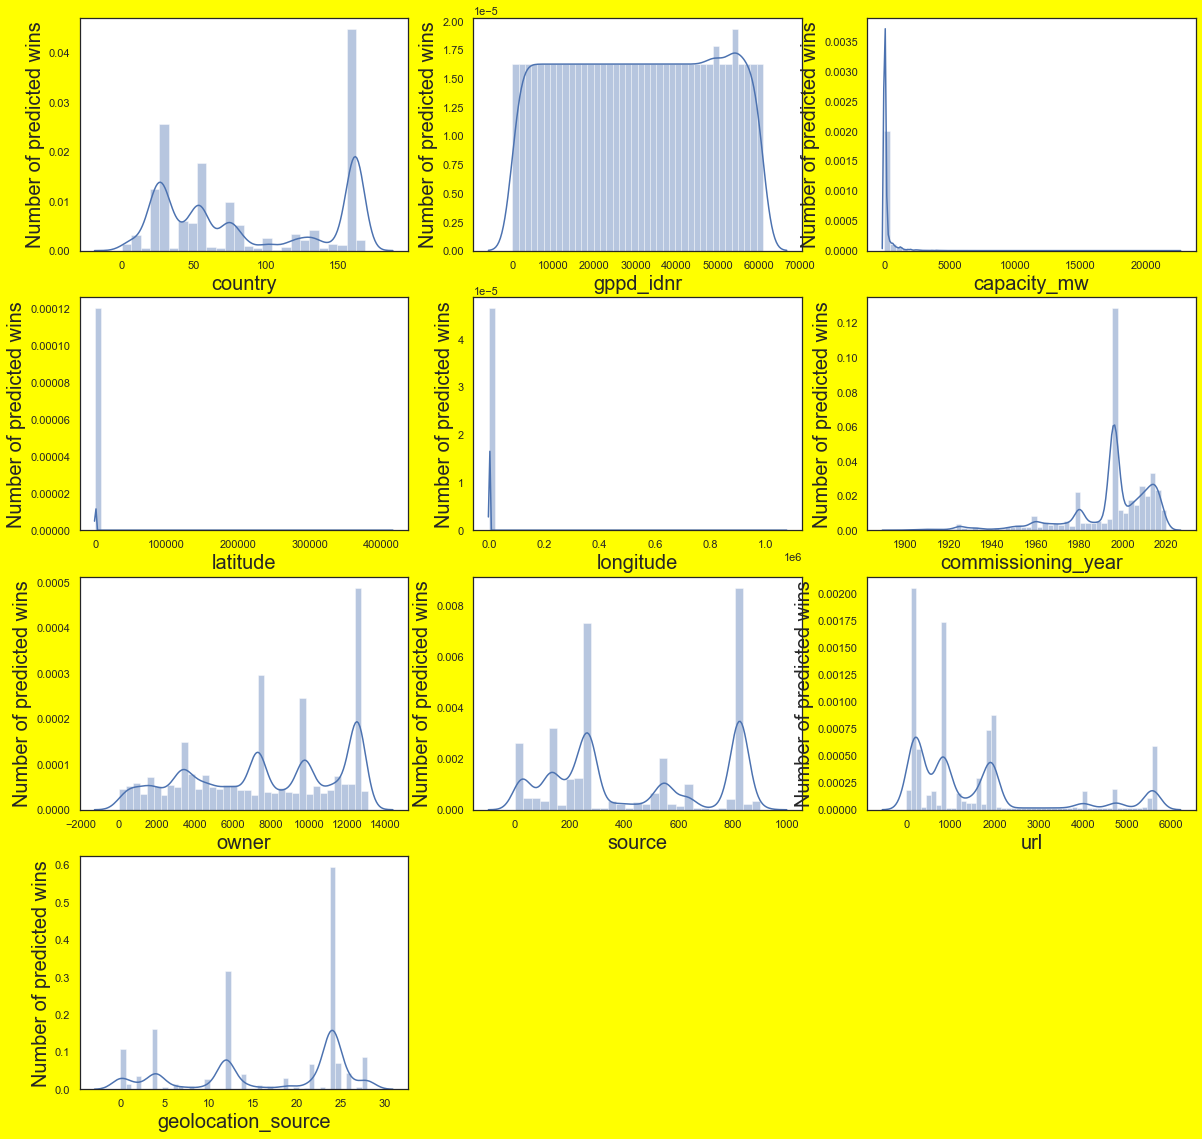

In [30]:
plt.figure(figsize=(20,30),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        plt.ylabel('Number of predicted wins',fontsize=20)
        plotnumber+=1
        
plt.show()

In [31]:
df.skew()

country                 0.234538
gppd_idnr              -0.012148
capacity_mw             9.103809
latitude              127.350873
longitude             123.964012
primary_fuel            0.581563
commissioning_year     -1.664571
owner                  -0.237108
source                  0.226620
url                     1.392525
geolocation_source     -0.543080
dtype: float64

In [32]:

## We can see there are many skewness in different columns.
## Lets treat skewness of required columns with continous data.
df['capacity_mw']=np.sqrt(df['capacity_mw'])
df['latitude']=np.log(df['latitude'])
df['longitude']=np.log(df['longitude'])

In [33]:
from scipy.stats import skew
df.skew()

country               0.234538
gppd_idnr            -0.012148
capacity_mw           2.609931
latitude             -2.794200
longitude            -1.139680
primary_fuel          0.581563
commissioning_year   -1.664571
owner                -0.237108
source                0.226620
url                   1.392525
geolocation_source   -0.543080
dtype: float64

country                   AxesSubplot(0.125,0.71587;0.133621x0.16413)
gppd_idnr              AxesSubplot(0.285345,0.71587;0.133621x0.16413)
capacity_mw             AxesSubplot(0.44569,0.71587;0.133621x0.16413)
latitude               AxesSubplot(0.606034,0.71587;0.133621x0.16413)
longitude              AxesSubplot(0.766379,0.71587;0.133621x0.16413)
primary_fuel             AxesSubplot(0.125,0.518913;0.133621x0.16413)
commissioning_year    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
owner                  AxesSubplot(0.44569,0.518913;0.133621x0.16413)
source                AxesSubplot(0.606034,0.518913;0.133621x0.16413)
url                   AxesSubplot(0.766379,0.518913;0.133621x0.16413)
geolocation_source       AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

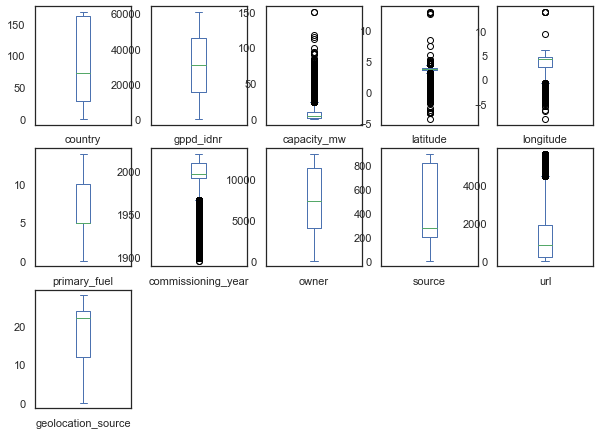

In [34]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

In [35]:
## Number of outliers are more than 50%. So I am not removing outiers. 

In [36]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,4.255947,country
1,5.753099,gppd_idnr
2,1.155138,capacity_mw
3,51.208966,latitude
4,51.203657,longitude
5,14.968608,commissioning_year
6,5.653752,owner
7,6.071488,source
8,2.027940,url
9,8.535721,geolocation_source


In [38]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [40]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

       Actual  Predicted
8815      3.0        3.0
3416     14.0       10.0
7636     14.0        5.0
19386    14.0       10.0
1076      0.0        5.0

Confussion matrix:
[[ 152    5    0   19    0   94    0   24    0    0   26    2    6    0
    18]
 [  16  562    0  102    3   77    8   12    0    0    5    0    1    0
     3]
 [   1    1    1    1    0    0    0    1    0    0    1    0    0    0
     0]
 [  55  205    2  872    9  163    8   59    5    0   29    1   21    0
    37]
 [   0    3    0    7   21   10    0    3    0    0    3    0    4    0
     1]
 [ 137  247    2  335   22 3765    2   66    1    0   86    2    8    0
    66]
 [   0   25    0   27    0   13   12    0    0    0    0    0    0    0
     0]
 [  61   35    1  235    2  207    4  494    1    0   14    0   15    0
     5]
 [   5    1    0    3    0    6    0    0    1    0    1    0    3    0
     1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [  60    2    0   30    5  18

In [41]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.667859175542727


In [42]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

         0.0       0.26      0.44      0.32       346
         1.0       0.51      0.71      0.60       789
         2.0       0.08      0.17      0.11         6
         3.0       0.47      0.59      0.53      1466
         4.0       0.30      0.40      0.35        52
         5.0       0.77      0.79      0.78      4739
         6.0       0.35      0.16      0.22        77
         7.0       0.66      0.46      0.54      1074
         8.0       0.06      0.05      0.05        21
         9.0       0.00      0.00      0.00         0
        10.0       0.78      0.77      0.78      1665
        11.0       0.17      0.10      0.12        21
        12.0       0.47      0.24      0.32       352
        13.0       0.00      0.00      0.00         4
        14.0       0.83      0.57      0.67      1687

    accuracy                           0.67     12299
   macro avg       0.38      0.36      0.36     12299
weighted avg       0.69   

In [43]:
## I am choosing this model because our taget variable is binary classification.
logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=40)

In [44]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

       Actual  Predicted
10532     5.0       10.0
13779     5.0       10.0
1550      5.0        5.0
8441     10.0       10.0
14662    10.0       10.0

Confussion matrix:
[[   0    0    0    0    0  243    0    0    0   56    0    0    0   47]
 [   0  260    0  139    0  299    1    0    0    5    0    0    0   85]
 [   0    0    0    0    0    6    0    0    0    0    0    0    0    0]
 [   0  101    0  266    0  868    1    0    0  129    0    0    0  101]
 [   0    1    0    2    0   31    0    0    0   10    0    0    0    8]
 [   0   47    0   68    0 3798    8    0    0  567    0    0    0  251]
 [   0   31    0   30    0   11    5    0    0    0    0    0    0    0]
 [   0   23    0   36    0  872    0    0    0  112    0    0    0   31]
 [   0    0    0    0    0    9    0    0    0    2    0    0    0   10]
 [   0    2    0   22    0  440    0    0    0 1070    0    0    0  131]
 [   0    0    0    0    0    1    0    0    0   20    0    0    0    0]
 [   0    0    0    1    0 

In [45]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.48377916903813317


In [46]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       346
         1.0       0.56      0.33      0.41       789
         2.0       0.00      0.00      0.00         6
         3.0       0.43      0.18      0.26      1466
         4.0       0.00      0.00      0.00        52
         5.0       0.50      0.80      0.62      4739
         6.0       0.33      0.06      0.11        77
         7.0       0.00      0.00      0.00      1074
         8.0       0.00      0.00      0.00        21
        10.0       0.45      0.64      0.53      1665
        11.0       0.00      0.00      0.00        21
        12.0       0.00      0.00      0.00       352
        13.0       0.00      0.00      0.00         4
        14.0       0.44      0.33      0.37      1687

    accuracy                           0.48     12299
   macro avg       0.19      0.17      0.16     12299
weighted avg       0.40      0.48      0.42     12299



In [47]:
## I am using different model to verify which is the best model and the most accurate one.

In [48]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

       Actual  Predicted
8815      3.0        3.0
3416     14.0        3.0
7636     14.0        5.0
19386    14.0        5.0
1076      0.0       14.0

Confussion matrix:
[[  49    1    0   26    0  177    0   41    0   13    0    7    0   32]
 [   3  497    0  143    0  120    6   11    0    2    0    3    0    4]
 [   0    0    1    3    0    1    0    0    0    1    0    0    0    0]
 [   9   75    0  922    0  249    9  104    0   41    0   28    0   29]
 [   0    0    0   16    7   17    0    4    0    8    0    0    0    0]
 [  61  107    0  267    3 4000    6  131    0   42    0   17    0  105]
 [   0   26    0   26    0    6   15    4    0    0    0    0    0    0]
 [   8   24    0  149    2  225    2  606    1   29    0   24    0    4]
 [   1    0    0    2    0   14    0    1    0    0    0    2    0    1]
 [   7    0    0   23    0  524    0   15    0  987    0   43    0   66]
 [   0    0    0    0    0   10    0    0    0   10    0    1    0    0]
 [  21    3    1   90    1 

In [49]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.6496463127083503


In [50]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.27      0.14      0.19       346
         1.0       0.67      0.63      0.65       789
         2.0       0.50      0.17      0.25         6
         3.0       0.51      0.63      0.57      1466
         4.0       0.50      0.13      0.21        52
         5.0       0.68      0.84      0.75      4739
         6.0       0.39      0.19      0.26        77
         7.0       0.58      0.56      0.57      1074
         8.0       0.00      0.00      0.00        21
        10.0       0.78      0.59      0.67      1665
        11.0       0.00      0.00      0.00        21
        12.0       0.44      0.30      0.35       352
        13.0       0.00      0.00      0.00         4
        14.0       0.76      0.47      0.58      1687

    accuracy                           0.65     12299
   macro avg       0.43      0.33      0.36     12299
weighted avg       0.65      0.65      0.64     12299



In [51]:
## We can see KNN has highest Accuracy Score.

In [52]:
## Now Lets take capacity_mw as Target data and other attributes as feature data.

In [53]:
df_New=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],axis=0)

In [54]:
df_New

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,generation_gwh_2018,generation_gwh_2019,generation_data_source,fuel1,fuel2,fuel3,fuel4
0,ARG,Argentina,AGUA DEL CAJON (AUTOGENERADOR DEL MEM),ARG0000231,479.20,-38.9368,-68.3556,Other,Gas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,Argentina,AGUA DEL CAJON (GENERADOR DEL MEM),ARG0000232,192.00,-38.9368,-68.3556,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARG,Argentina,AGUA DEL TORO,ARG0000210,130.00,-34.5792,-68.9892,Hydro,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,Argentina,AGUA ESCONDIDA,ARG0000204,0.00,-36.1550,-68.3019,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,Argentina,ALGARROBO DEL AGUILA,ARG0000171,0.14,-36.3992,-67.1461,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,YEM,Yemen,Sana'a,YEM0000017,11.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN
8,YEM,Yemen,Shehr,YEM0000033,5.20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN
9,YEM,Yemen,Syaon1,YEM0000036,13.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN
10,YEM,Yemen,Syaon2,YEM0000039,12.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Oil,NaN,NaN,NaN


In [55]:
df_New.isnull().sum()

country                         0
country_long                    0
name                          116
gppd_idnr                       0
capacity_mw                  3016
latitude                     8222
longitude                    8222
primary_fuel                10498
other_fuel1                 59451
other_fuel2                 61217
other_fuel3                 61401
commissioning_year          39638
owner                       32280
source                        151
url                           168
geolocation_source           9878
wepp_id                     61493
year_of_capacity_data       31307
generation_gwh_2013         54704
generation_gwh_2014         53957
generation_gwh_2015         53209
generation_gwh_2016         52497
generation_gwh_2017         52166
estimated_generation_gwh    61493
generation_gwh_2018         51667
generation_gwh_2019         51717
generation_data_source      49868
fuel1                       55724
fuel2                       61326
fuel3         

In [56]:
##Lets remove unwanted  columns. here I am deleating these coluns on the basis of null value inn columns.
df_New.drop('other_fuel1',
             axis = 1,
             inplace = True)
df_New.drop('other_fuel2',
             axis = 1,
             inplace = True)

df_New.drop('country_long',
             axis = 1,
             inplace = True)
df_New.drop('other_fuel3',
             axis = 1,
             inplace = True)
df_New.drop('wepp_id',
             axis = 1,
             inplace = True)
df_New.drop('generation_gwh_2013',
             axis = 1, 
             inplace = True)
df_New.drop('generation_gwh_2019', 
             axis = 1,
             inplace = True)
df_New.drop('generation_gwh_2014', 
             axis = 1,
             inplace = True)
df_New.drop('generation_gwh_2015', 
             axis = 1,
             inplace = True)
df_New.drop('generation_gwh_2016', 
             axis = 1,
             inplace = True)
df_New.drop('generation_gwh_2017', 
             axis = 1,
             inplace = True)
df_New.drop('generation_gwh_2018', 
             axis = 1,
             inplace = True)

df_New.drop('estimated_generation_gwh', 
             axis = 1,
             inplace = True)

df_New.drop('generation_data_source', 
             axis = 1,
             inplace = True)
df_New.drop('year_of_capacity_data', 
             axis = 1,
             inplace = True)
df_New.drop('name', 
             axis = 1,
             inplace = True)


df_New.drop('fuel1', 
             axis = 1,
             inplace = True)

df_New.drop('fuel2', 
             axis = 1,
             inplace = True)

df_New.drop('fuel3', 
             axis = 1,
             inplace = True)

df_New.drop('fuel4', 
             axis = 1,
             inplace = True)


In [57]:
df_New.columns

Index(['country', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source'],
      dtype='object')

In [58]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df_New.columns:
    if df_New[i].dtype=="object":
        df_New[i]=enc.fit_transform(df_New[i].values.reshape(-1,1))
df_New.head()

,country,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source
0,4.0,224.0,479.20,-38.9368,-68.3556,8.0,1997.4,1472.0,485.0,182.0,17.0
1,4.0,225.0,192.00,-38.9368,-68.3556,3.0,1993.5,1472.0,485.0,182.0,17.0
2,4.0,203.0,130.00,-34.5792,-68.9892,5.0,1982.0,5249.0,485.0,182.0,17.0
3,4.0,197.0,0.00,-36.1550,-68.3019,7.0,NaN,3306.0,485.0,182.0,17.0
4,4.0,169.0,0.14,-36.3992,-67.1461,7.0,NaN,266.0,485.0,182.0,17.0


In [59]:
##Lets divide data into two features(x) and Label(y)
x=df_New.drop("capacity_mw", axis=1)
y=df_New['capacity_mw']

In [60]:
df_New['geolocation_source'] = df_New['geolocation_source'].fillna(df_New['geolocation_source'].mode()[0])
df_New['capacity_mw'].fillna(int(df_New['capacity_mw'].mean()), inplace=True)
df_New['latitude'].fillna(method='ffill', inplace=True)
df_New['longitude'].fillna(method='ffill', inplace=True)
df_New['commissioning_year'].fillna(method='ffill', inplace=True)
df_New['owner'].fillna(method='ffill', inplace=True)
df_New['url'] = df_New['url'].fillna(df_New['url'].mode()[0])
df_New['source'] = df_New['source'].fillna(df_New['source'].mode()[0])
df_New['primary_fuel'] = df_New['primary_fuel'].fillna(df_New['primary_fuel'].mode()[0])

In [61]:
df_New.isnull().sum()

country               0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
owner                 0
source                0
url                   0
geolocation_source    0
dtype: int64

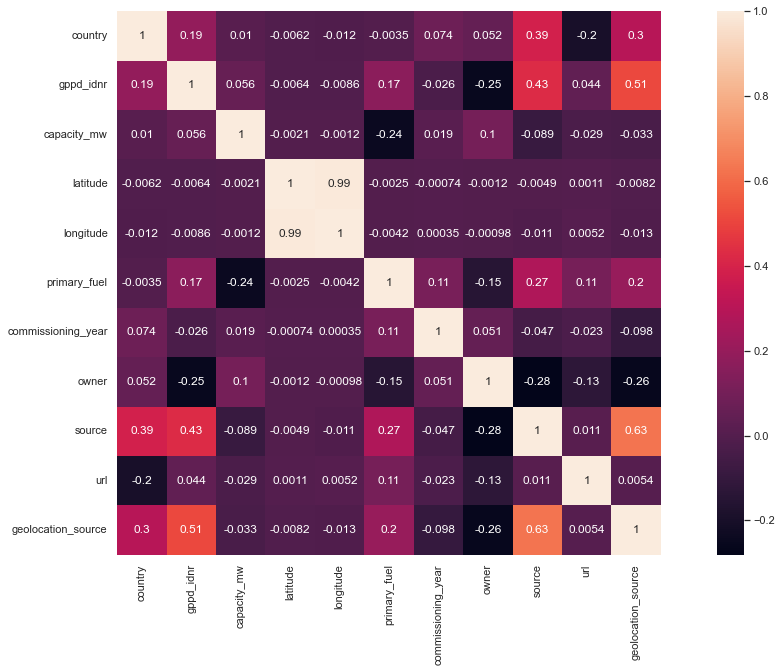

In [62]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_New.corr(method='pearson'), annot=True, square=True)
plt.show()

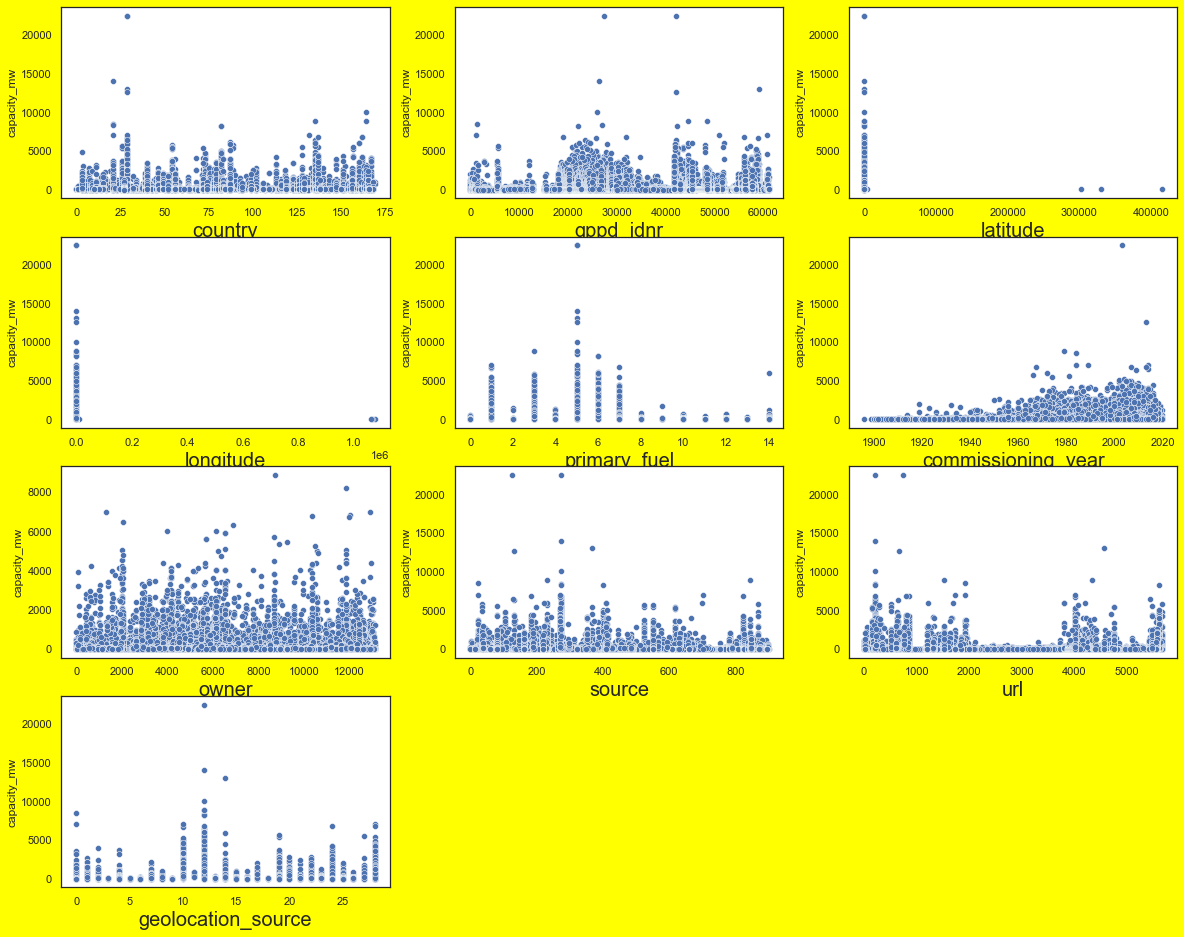

In [63]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("capacity_mw")
        
        plotnumber+=1
        
plt.show()

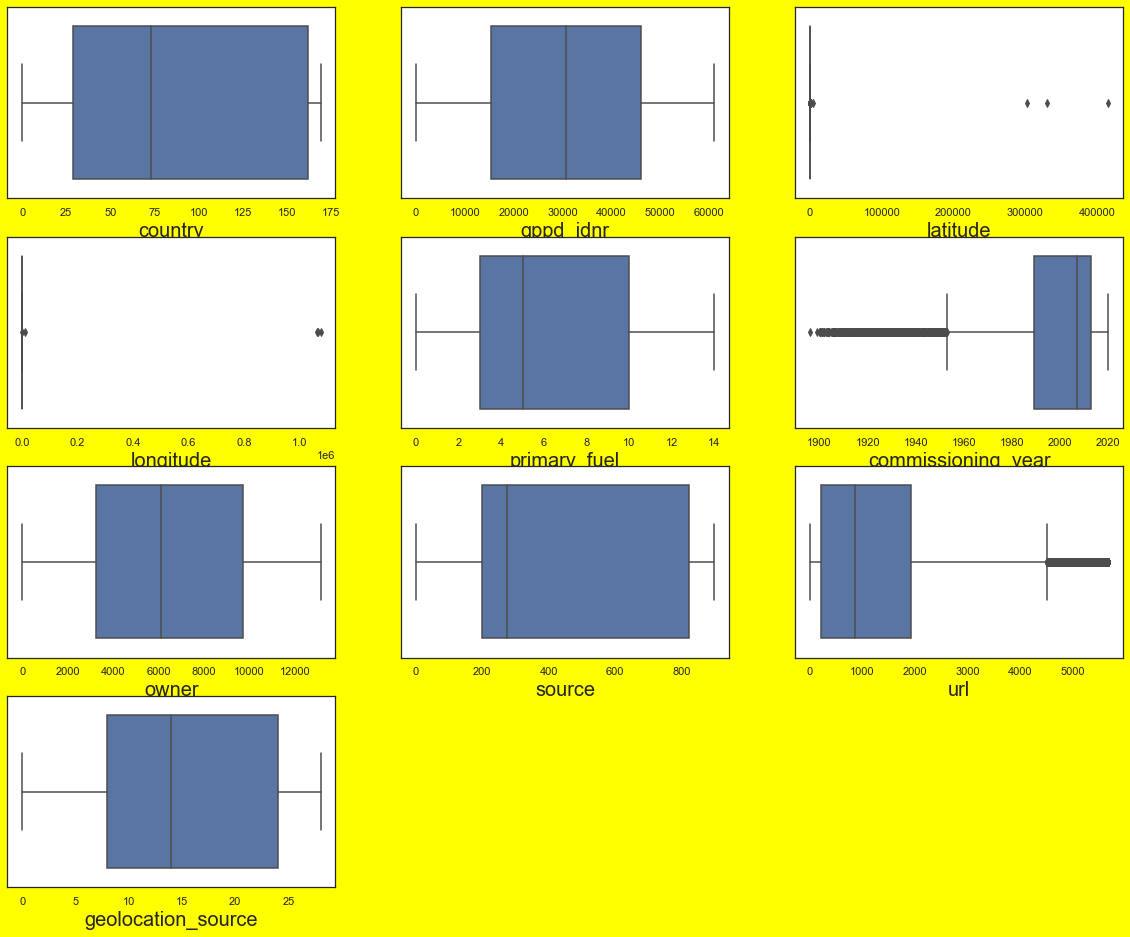

In [64]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [65]:
##Lets divide data into two features(x) and Label(y)
x=df_New.drop("capacity_mw", axis=1)
y=df_New['capacity_mw']

In [66]:
df_New.shape

(61493, 11)

In [67]:
## We cansee there are outlier in some of columns. it is very less in number. Still I am using zscore method to remove outliers.

from scipy.stats import zscore
z= np.abs(zscore(df_New))
threshold=3
np.where(z>3)

(array([   83,   360,   492, ..., 61490, 61491, 61492], dtype=int64),
 array([2, 2, 2, ..., 6, 6, 6], dtype=int64))

In [68]:
df= df_New[(z<3).all(axis=1)]
df_New.shape

(61493, 11)

In [69]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,4.298206,country
1,5.688834,gppd_idnr
2,51.209576,latitude
3,51.204502,longitude
4,4.238491,primary_fuel
5,16.895083,commissioning_year
6,5.617621,owner
7,6.263429,source
8,2.039441,url
9,8.543586,geolocation_source


In [71]:
#Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 219.42015858984848
MSE: 208943.2537245529
RMSE: 457.10311060476596


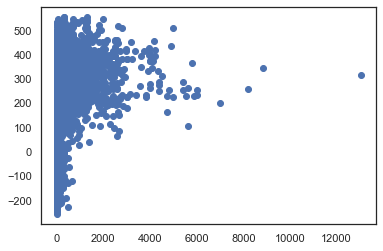

In [74]:
##Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

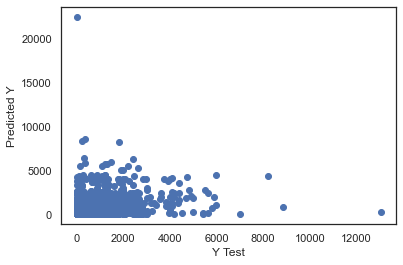

In [76]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [77]:
## We can see we got a straight line. so it is better model than LinearRegression. 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 139.81520423010187
MSE: 260977.27965827638
RMSE: 510.85935408708764


In [78]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

,Y Test,Pred
8815,977.5,703.407000
3416,36.8,98.990000
7636,11.0,11.017805
19386,4.0,26.522400
1076,12.0,24.557000


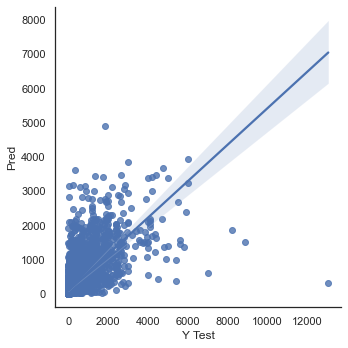

In [79]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 110.14116570024069
MSE: 118511.9204655901
RMSE: 344.25560339025725


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
z=GridSearchCV(ls,parameters)
z.fit(x_train,y_train)
print(z.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [89]:
from sklearn.metrics import r2_score
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.08729263911582918
MSE: 208938.60443179135
MAE: 219.17100914609088
RMSE: 457.09802497034633


In [90]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
z_=GridSearchCV(rd,parameters)
z_.fit(x_train,y_train)
print(z_.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [91]:
rd=Ridge(alpha=10,solver='sag')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.0872739259635249
MSE: 208942.88828014687
MAE: 219.3981757085031
RMSE: 457.1027108650165


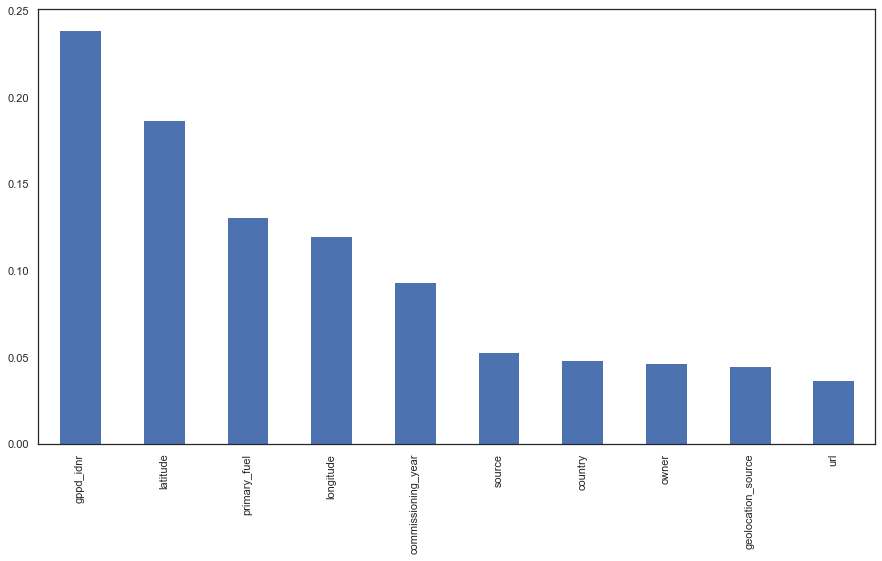

In [92]:
##We can see accuracy score of Random forest is highest.
pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [93]:
## Conclusion:-

##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy.
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also get to know where to use  Random Forest, Logistic Regression,DecisionTreeRegressor  and other applicable and required models to fine tune the predictions.
##We can see Logistic Regression has highiest accuracy score on the basis of least RMSE.
## I tried to fid the best model for prediction by taking two target variables.
## Lets check importance of different feature on the basis of random forest.

In [94]:
print("                 ***************** END OF PROJECT*******************                      ")

                 ***************** END OF PROJECT*******************                      
